In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [260]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [261]:
# Read datasets
store = pd.read_csv('data\\store.csv')   
train = pd.read_csv('data\\train.csv')
test = pd.read_csv('data\\test.csv')  

C:\Users\Admin\AppData\Local\Temp\ipykernel_12208\439415416.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('data\\train.csv')


In [262]:
# Create merged DataFrame for analysis
df_merge = pd.merge(train, store, on='Store', how='left')
print(df_merge.shape)


(1017209, 18)


In [263]:
print(df_merge.info())
df_merge.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [264]:
# Check for missing values
df_merge.isnull().sum().sort_values(ascending=False)

Promo2SinceWeek              508031
PromoInterval                508031
Promo2SinceYear              508031
CompetitionOpenSinceYear     323348
CompetitionOpenSinceMonth    323348
CompetitionDistance            2642
DayOfWeek                         0
Store                             0
Date                              0
Sales                             0
StoreType                         0
SchoolHoliday                     0
StateHoliday                      0
Promo                             0
Open                              0
Customers                         0
Assortment                        0
Promo2                            0
dtype: int64

In [265]:
# fill na values = 0
df_merge[['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']] = df_merge[['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].fillna(0)
df_merge[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']] = df_merge[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].fillna(0)

# fill 'CompetitionDistance' na values with median
median_competition_distance = df_merge['CompetitionDistance'].median()
df_merge['CompetitionDistance'] = df_merge['CompetitionDistance'].fillna(median_competition_distance)

In [266]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [267]:
# Extract time features
df_merge['Date'] = pd.to_datetime(df_merge['Date'], format='%Y-%m-%d')
df_merge['Year'] = df_merge['Date'].dt.year   
df_merge['Month'] = df_merge['Date'].dt.month
df_merge['Day'] = df_merge['Date'].dt.day
df_merge['WeekOfYear'] = df_merge['Date'].dt.isocalendar().week

print(f"Start date starts from: {df_merge['Date'].min()} to end date: {df_merge['Date'].max()}")
print(f"Total days: {(df_merge['Date'].max() - df_merge['Date'].min()).days}")

Start date starts from: 2013-01-01 00:00:00 to end date: 2015-07-31 00:00:00
Total days: 941


In [268]:
print("Unique values for categorical features:")
cols_to_check = ['StoreType', 'Assortment', 'StateHoliday', 'SchoolHoliday']
for col in cols_to_check:
    print(f"{col}: {df_merge[col].unique()}")

Unique values for categorical features:
StoreType: ['c' 'a' 'd' 'b']
Assortment: ['a' 'c' 'b']
StateHoliday: ['0' 'a' 'b' 'c' 0]
SchoolHoliday: [1 0]


In [269]:
# Handle 'StateHoliday' feature
df_merge['StateHoliday'] = df_merge['StateHoliday'].astype(str)
# Map '0' và 0 values into '0' string
df_merge['StateHoliday'] = df_merge['StateHoliday'].replace({'0': '0', 0: '0'})

In [270]:
df_open = df_merge.copy()
print("\nLẤY HẾT CẢ NHỮNG NGÀY ĐÓNG CỬA ĐỂ XEM TÁC ĐỘNG ĐỐI VỚI SALES")
print(f"Tổng số dòng: {df_open.shape[0]}")
print(f"Tổng số cột: {df_open.shape[1]}")
display(df_open.head())


LẤY HẾT CẢ NHỮNG NGÀY ĐÓNG CỬA ĐỂ XEM TÁC ĐỘNG ĐỐI VỚI SALES
Tổng số dòng: 1017209
Tổng số cột: 22


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31,31


In [271]:
# Feature engineering các biến Competition và Promo thành biến có ý nghĩa hơn
# Tính thời gian đối thủ mở cửa hàng (tính theo tháng)
df_open['CompetitonOpen'] = 12 * (df_open['Year'] - df_open['CompetitionOpenSinceYear']) + (df_open['Month'] - df_open['CompetitionOpenSinceMonth'])
# Nếu CompetitonOpen < 0 thì gán = 0 (đối thủ chưa mở cửa)
df_open['CompetitionOpen'] = df_open['CompetitonOpen'].apply(lambda x: x if x > 0 else 0)
# Tính thời gian tham gia promo2 (tính theo tháng) và gán giá trị âm bằng 0 (Không tham gia promo2)
df_open['Promo2Open'] = 12 * (df_open['Year'] - df_open['Promo2SinceYear']) + ((df_open['WeekOfYear'] - df_open['Promo2SinceWeek']) // 4)
df_open['Promo2Open'] = df_open['Promo2Open'].apply(lambda x: x if x > 0 else 0)
# Bỏ các cột gốc đi để tránh nhiễu
cols_to_drop = ['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'Promo2SinceYear', 'Promo2SinceWeek']
df_open = df_open.drop(columns=cols_to_drop)

In [272]:
# More feature engineering on time features
# 1. Thêm các cột đánh dấu thời gian đặc biệt
df_open['IsWeekend'] = df_open['DayOfWeek'].apply(lambda x: 1 if x >= 6 else 0)
df_open['IsMonthStart'] = df_open['Day'].apply(lambda x: 1 if x == 1 else 0)
df_open['IsMonthEnd'] = df_open['Day'].apply(lambda x: 1 if x >= 30 else 0) 

# 2. Cyclical Encoding cho DayOfWeek và Month
# Giúp model hiểu tính chu kỳ (Thứ 7 gần Chủ Nhật, Tháng 12 gần Tháng 1)
df_open['DayOfWeek_Sin'] = np.sin(2 * np.pi * df_open['DayOfWeek'] / 7)
df_open['DayOfWeek_Cos'] = np.cos(2 * np.pi * df_open['DayOfWeek'] / 7)
df_open['Month_Sin'] = np.sin(2 * np.pi * df_open['Month'] / 12)
df_open['Month_Cos'] = np.cos(2 * np.pi * df_open['Month'] / 12)

# 3. Tính toán các biến tương tác
df_open['SalesPerCustomer'] = df_open['Sales'] / df_open['Customers'].replace(0, np.nan)  # Tránh chia cho 0

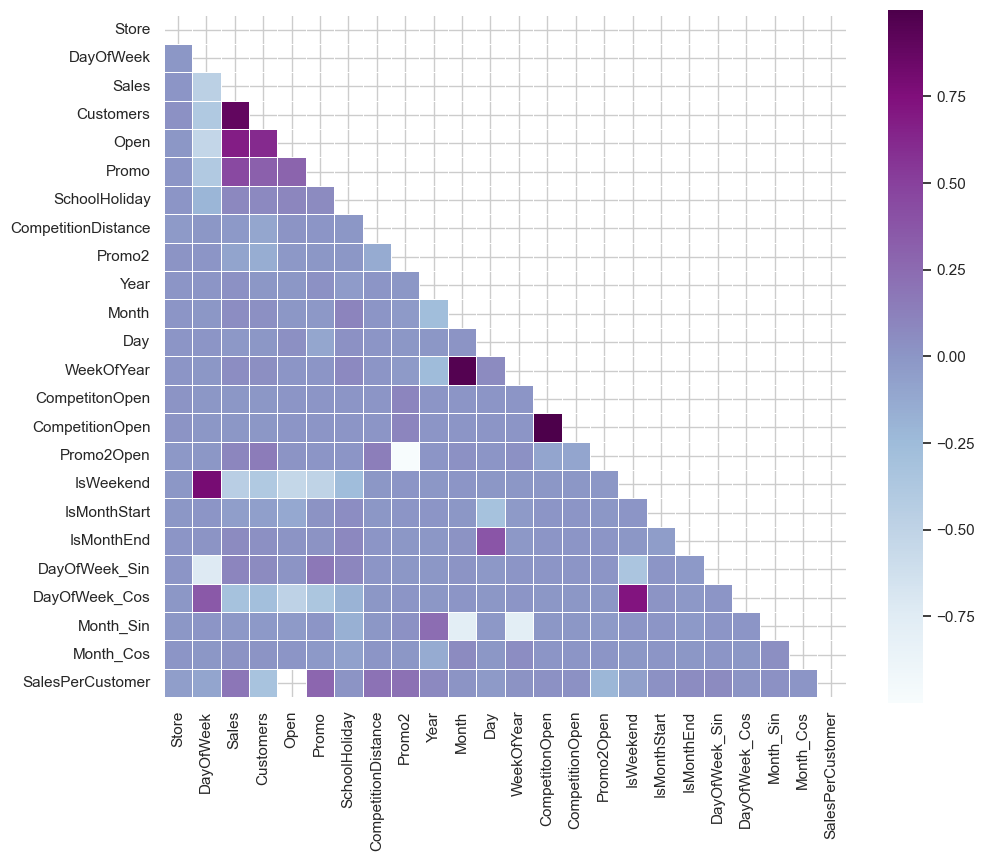

In [273]:
# Heatmap
# Lấy numerical columns rồi loại 'Open'
df_num = df_open.select_dtypes(include=[np.number])

# Compute correlation
corr_all = df_num.corr()

# Mask upper triangle
mask = np.zeros_like(corr_all, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot
plt.figure(figsize=(11, 9))
sns.heatmap(corr_all, mask=mask, cmap="BuPu", square=True, linewidths=0.5)
plt.show()


# 1. ẢNH HƯỞNG CỦA THỜI GIAN ĐỐI VỚI DOANH THU 

In [274]:
# Teset time-series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# 2. Gom nhóm dữ liệu theo Tháng (Monthly Resampling)
# Chúng ta tính tổng hoặc trung bình doanh thu mỗi tháng.
# 'M' là ký hiệu cho MonthEnd (cuối tháng).
ts_data = df_open.groupby(pd.Grouper(key='Date', freq='M'))['Sales'].mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12208\2329534238.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_data = df_open.groupby(pd.Grouper(key='Date', freq='M'))['Sales'].mean()


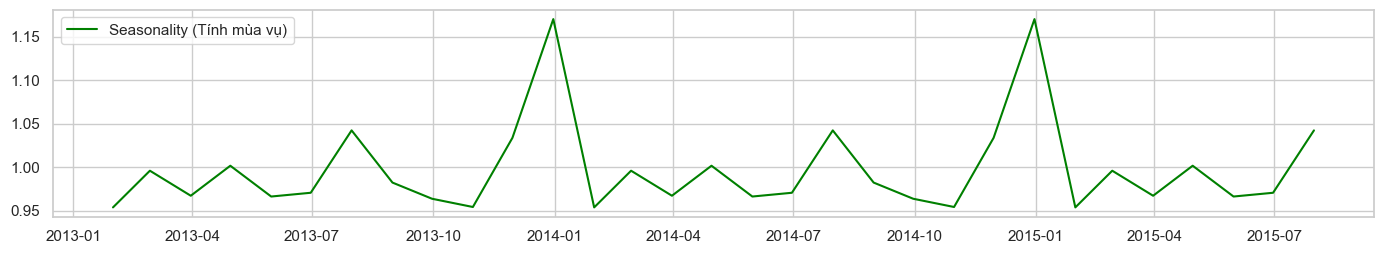

In [275]:
# 3. Thực hiện phân rã
# period=12 nghĩa là chu kỳ lặp lại mỗi 12 tháng (1 năm)
decomposition = seasonal_decompose(ts_data, model='multiplicative', period=12)

# 4. Trực quan hóa các thành phần
# Lấy ra từng thành phần
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Vẽ biểu đồ gộp
plt.figure(figsize=(14, 10))

# plt.subplot(411)
# plt.plot(ts_data, label='Original (Dữ liệu gốc)', color='blue')
# plt.legend(loc='upper left')
# plt.title('Phân rã Chuỗi thời gian Doanh thu (Time Series Decomposition)')

# plt.subplot(412)
# plt.plot(trend, label='Trend (Xu hướng)', color='red')
# plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality (Tính mùa vụ)', color='green')
plt.legend(loc='upper left')

# plt.subplot(414)
# plt.plot(residual, label='Residuals (Nhiễu/Phần dư)', color='black')
# plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# 1.1. Tháng 12 là "mỏ vàng" doanh thu trong năm
- Tháng 11: Doanh thu trung bình tăng mạnh
- Tháng 12: Doanh thu trung bình đạt đỉnh cao nhất năm

=> Insight: 
+ Đây là mùa cao điểm bán hàng bởi có ngày lễ Giáng Sinh khiến nhu cầu mua sắm tăng mạnh được thể hiện qua lượng khách tăng cao vào dịp này 

In [276]:
# 1. Tính trung bình Sales và Customers theo Tháng
monthly_stats = df_open.groupby('Month')[['Sales', 'Customers']].mean()

# 2. Tính % tăng trưởng so với tháng trước đó để thấy rõ "tăng mạnh" hay không
monthly_stats['Sales_Growth_Pct'] = monthly_stats['Sales'].pct_change() * 100
monthly_stats['Customers_Growth_Pct'] = monthly_stats['Customers'].pct_change() * 100

# 3. Hiển thị bảng số liệu của Quý 4 (Tháng 10, 11, 12) để so sánh
print("Số liệu trung bình Quý 4")
display(monthly_stats.loc[[10, 11, 12]])

# 4. Xác nhận tháng có doanh thu cao nhất
max_sales_month = monthly_stats['Sales'].idxmax()
print(f"\nTháng có doanh thu trung bình cao nhất năm là: Tháng {max_sales_month}")

Số liệu trung bình Quý 4


,Sales,Customers,Sales_Growth_Pct,Customers_Growth_Pct
Month,,,,
10,5537.037419,631.095987,-0.596179,-0.526877
11,6008.111821,654.147967,8.507698,3.652690
12,6826.611377,703.067899,13.623241,7.478420



Tháng có doanh thu trung bình cao nhất năm là: Tháng 12


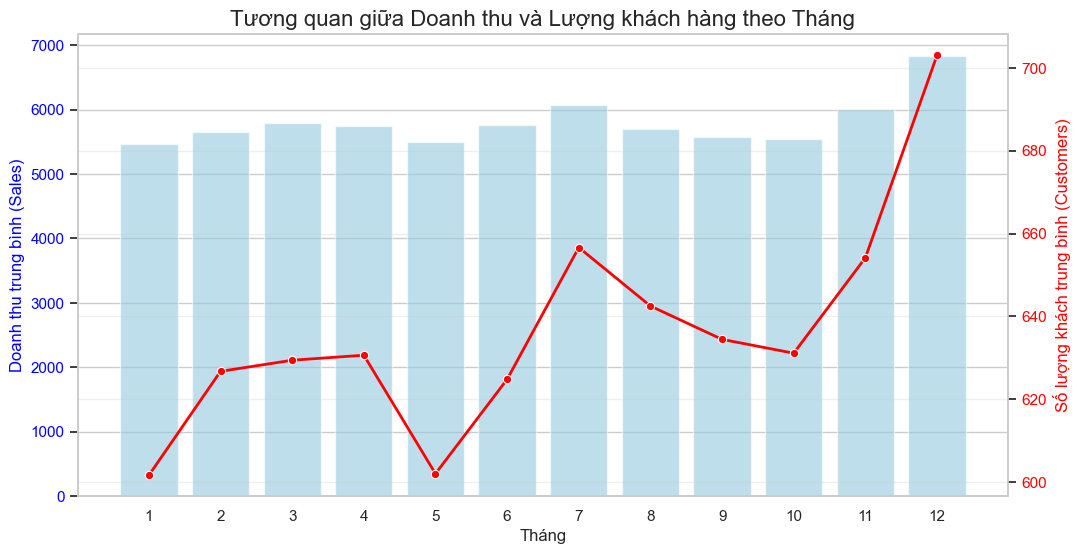

In [277]:
# Thiết lập biểu đồ
fig, ax1 = plt.subplots(figsize=(12, 6))

# Trục 1: Vẽ biểu đồ cột cho Doanh thu (Sales)
sns.barplot(x=monthly_stats.index, y=monthly_stats['Sales'], color='skyblue', alpha=0.6, ax=ax1)
ax1.set_ylabel('Doanh thu trung bình (Sales)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Tháng', fontsize=12)

# Trục 2: Vẽ biểu đồ đường cho Lượng khách (Customers)
ax2 = ax1.twinx()
sns.lineplot(x=monthly_stats.index - 1, y=monthly_stats['Customers'], color='red', marker='o', linewidth=2, ax=ax2)
# Lưu ý: x - 1 vì barplot index bắt đầu từ 0, còn lineplot cần căn chỉnh lại cho khớp
ax2.set_ylabel('Số lượng khách trung bình (Customers)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Tương quan giữa Doanh thu và Lượng khách hàng theo Tháng', fontsize=16)
plt.grid(True, alpha=0.3)
plt.show()

## Kiểm tra theo từng năm

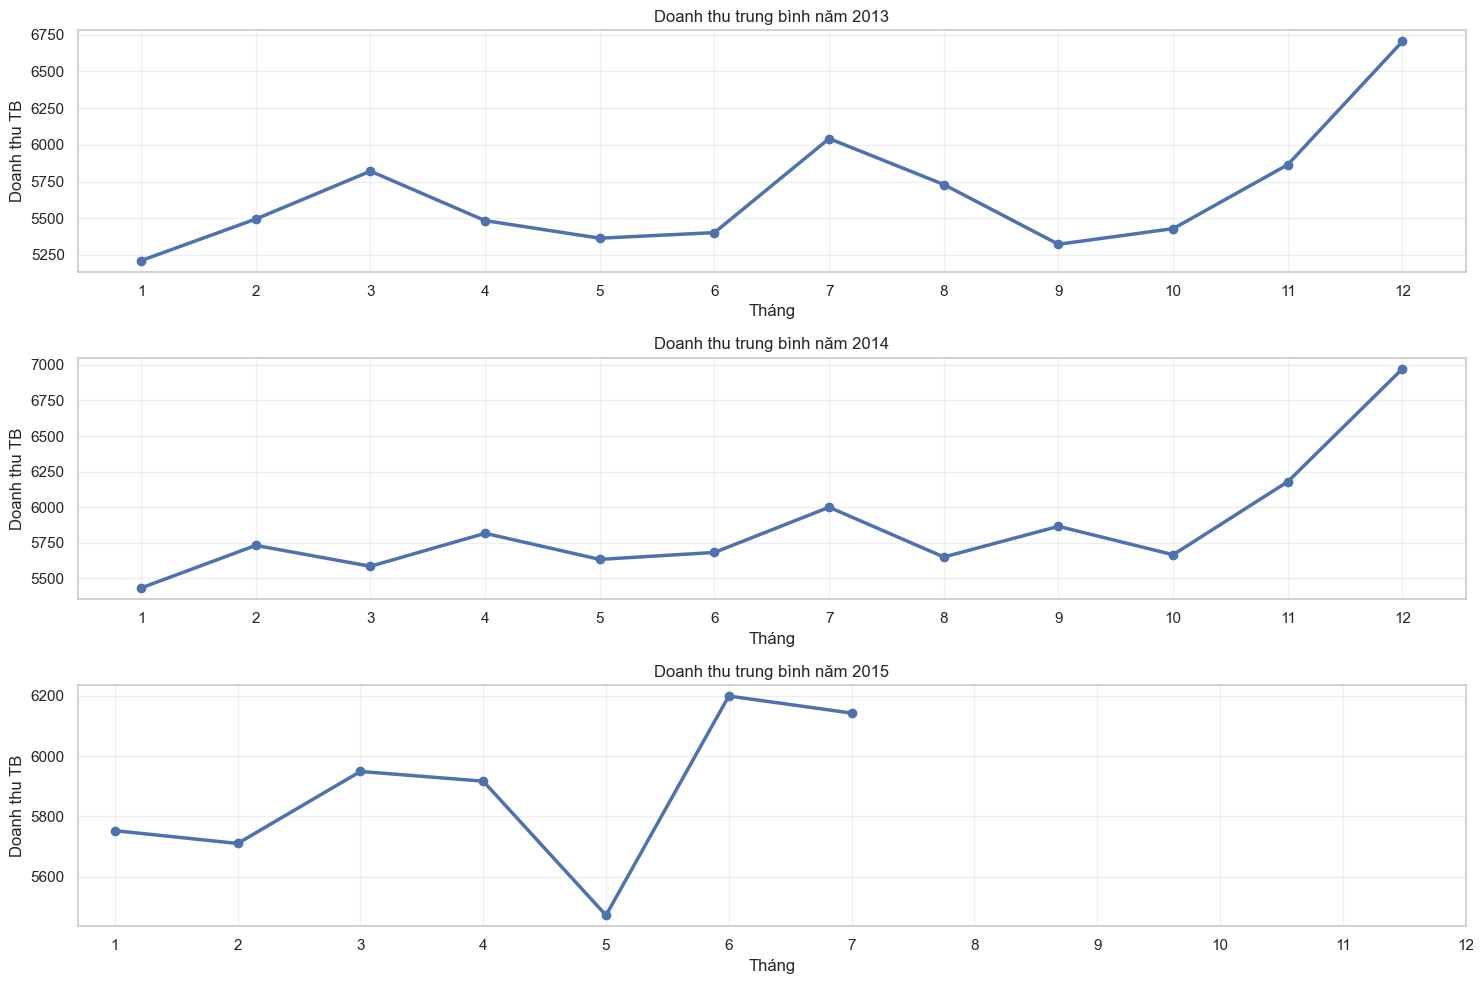

In [278]:
# monthly_sales: index = Month, columns = 2013, 2014, 2015

monthly_sales = df_open.groupby(['Year', 'Month'])['Sales'].mean().unstack(level=0)

years = monthly_sales.columns.tolist()

plt.figure(figsize=(15, 10))

for i, year in enumerate(years, 1):
    plt.subplot(3, 1, i)
    plt.plot(monthly_sales.index, monthly_sales[year], marker='o', linewidth=2.5)
    plt.title(f'Doanh thu trung bình năm {year}')
    plt.xlabel('Tháng')
    plt.ylabel('Doanh thu TB')
    plt.grid(True, alpha=0.3)
    plt.xticks(range(1, 13))

plt.tight_layout()
plt.show()


- **Tính chu kỳ nhất quán**: Khi quan sát doanh thu trung bình theo từng năm, xu hướng doanh thu đạt đỉnh vào cuối năm là chính xác với năm 2013 và 2014. Riêng năm 2015 vì chỉ có dữ liệu tới tháng 7.
- **Mức độ tăng trường**: Đỉnh tháng 12 của hai năm 2013 và 2014 cao vượt trội so với mức trung bình các tháng còn lại, cho thấy sức mua và lượng khách bùng nổ vào ngày lễ Giáng Sinh.

## Kiểm tra Sales cuối năm theo từng loại cửa hàng ("StoreType")

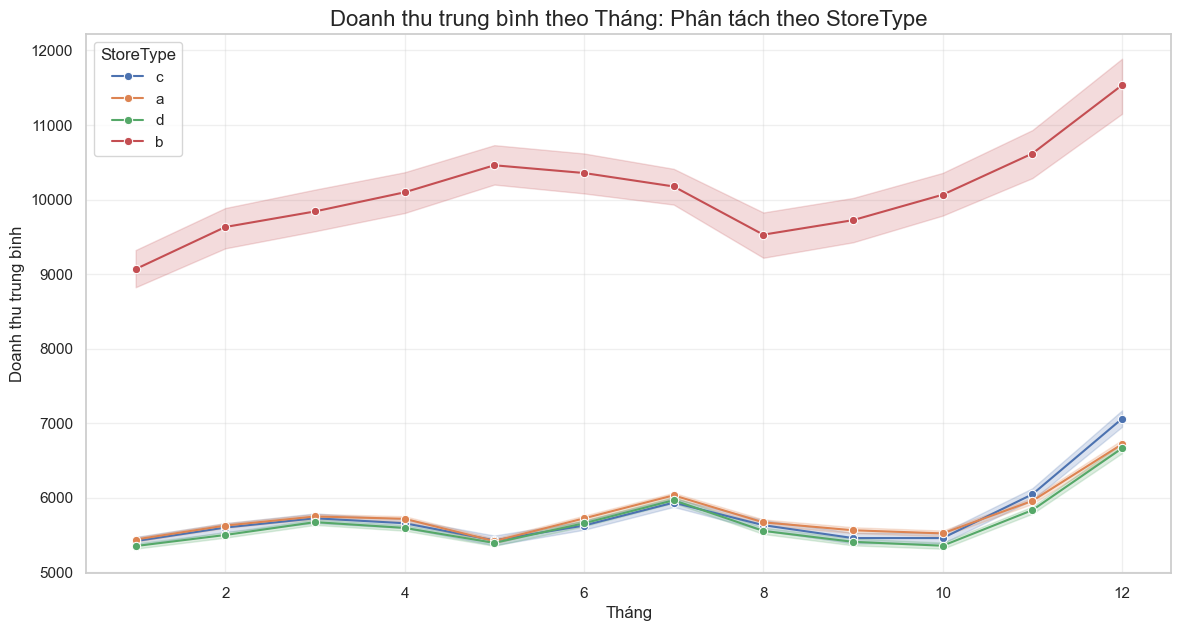

In [279]:
# Thiết lập kích thước biểu đồ
plt.figure(figsize=(14, 7))

sns.lineplot(x='Month', y='Sales', hue='StoreType', data=df_open, marker='o')

plt.title('Doanh thu trung bình theo Tháng: Phân tách theo StoreType', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu trung bình', fontsize=12)
plt.legend(title='StoreType')
plt.grid(True, alpha=0.3)
plt.show()

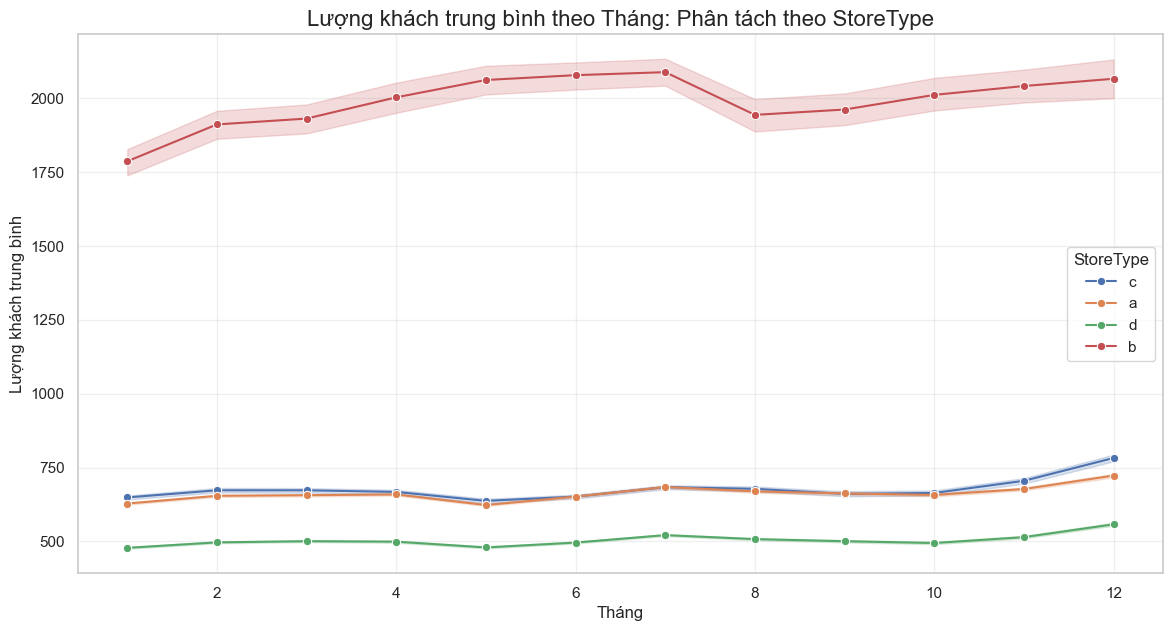

In [280]:
# Thiết lập kích thước biểu đồ
plt.figure(figsize=(14, 7))

sns.lineplot(x='Month', y='Customers', hue='StoreType', data=df_open, marker='o')

plt.title('Lượng khách trung bình theo Tháng: Phân tách theo StoreType', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Lượng khách trung bình', fontsize=12)
plt.legend(title='StoreType')
plt.grid(True, alpha=0.3)
plt.show()

- **Sự đồng thuận**: Tất cả các loại cửa hàng đều cho thấy đồ thị hình "cây thông" với đỉnh nhọn vào tháng 12. Điều này chứng tỏ hành vi mua sắm dịp Giáng sinh là hành vi phổ quát, không bị giới hạn bởi mô hình kinh doanh cụ thể.

### Actionable Insights: 
### Nhóm 1: StoreType 'b' - "Cỗ máy ổn định & Khác biệt"
- Insight:
    + Lượng khách (Customers) và Doanh thu (Sales) cực cao và ít bị biến động theo mùa hơn so với các nhóm khác.
    + Không có đỉnh nhọn hoắt vào tháng 12 như nhóm kia (hoặc mức tăng không quá đột biến so với nền tảng vốn đã cao).
    + Đây thường là các cửa hàng ở vị trí "đắc địa" (sân bay, ga tàu, trung tâm thành phố) phục vụ nhu cầu nhanh/tiện lợi.
- Actionable Plan:
    + Tối ưu hóa tốc độ (Speed of Service): Vì lượng khách cực đông, nút thắt cổ chai là ở quầy thanh toán. $\rightarrow$ Action: Đầu tư thêm máy POS, luồng di chuyển khách hàng (layout) phải thoáng, ưu tiên các mặt hàng "Grab & Go" (cầm đi ngay) ở gần quầy thu ngân.
    + Quản lý tồn kho linh hoạt (Just-in-Time): Do sức bán đều quanh năm, không cần tích trữ kho quá lớn cho tháng 12 (tránh chiếm diện tích). $\rightarrow$ Action: Duy trì tần suất nhập hàng cao (daily replenishment) thay vì nhập ồ ạt (bulk stocking).
    + Chiến lược bán chéo (Cross-selling): Khách đông nhưng có thể họ chỉ mua 1 món nước/đồ ăn nhanh. $\rightarrow$ Action: Combo bữa sáng/trưa để tăng giá trị đơn hàng (Basket Size).
### Nhóm 2: StoreType 'a', 'c', 'd' - "Thợ săn mùa vụ"
- Insight:
    + Biểu đồ hình "lòng chảo": Thấp ở đầu năm, tăng dần và bùng nổ vào tháng 11, 12.
    + Nhạy cảm cực cao với sự kiện Giáng sinh. Tháng 12 là tháng "sống còn"
- Actionable Plan:
    + Dồn lực cho Q4: Mọi ngân sách Marketing và chi phí vận hành nên dồn vào tháng 11-12.
    + Chương trình Loyalty: Trong các tháng thấp điểm (tháng 1-8), đừng cố giảm giá sâu để hút khách (vì nhu cầu tự nhiên thấp). Thay vào đó, hãy tích điểm để khách quay lại "đổi thưởng" vào tháng 12.
    + Quản trị nhân sự thời vụ: Tháng 1-9 dùng nhân sự tối thiểu (lean staff). Tháng 10 bắt đầu tuyển part-time để training kịp cho tháng 12.

## Kiểm tra Sales cuối năm theo Danh mục hàng hóa ("Assortment")

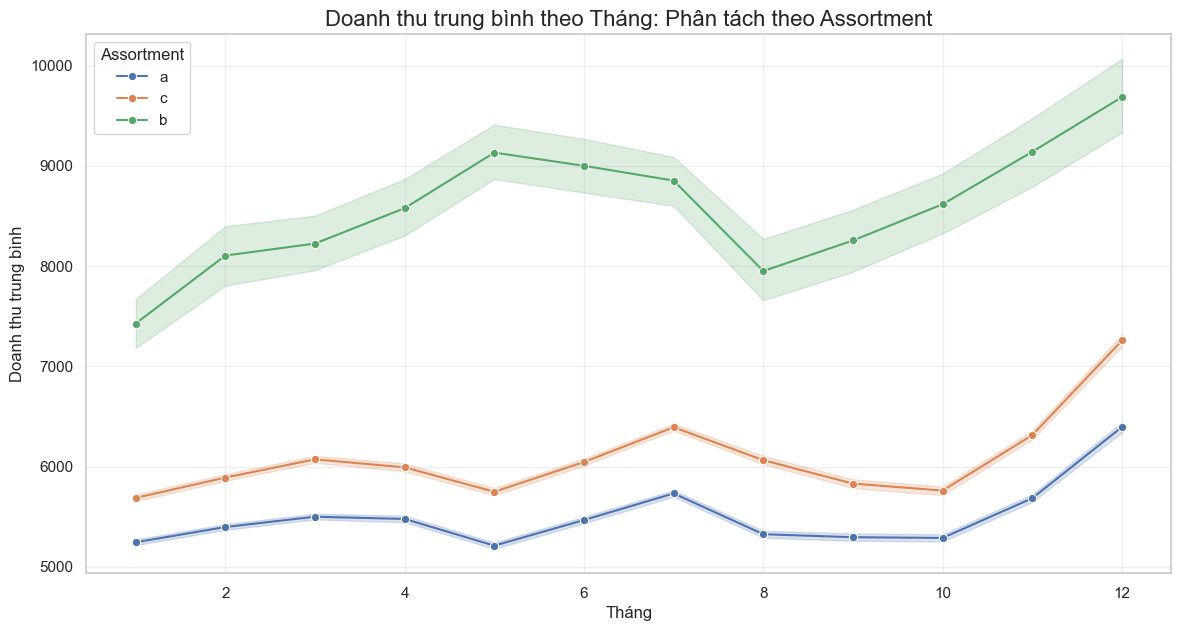

In [281]:
# Thiết lập kích thước biểu đồ
plt.figure(figsize=(14, 7))

sns.lineplot(x='Month', y='Sales', hue='Assortment', data=df_open, marker='o')

plt.title('Doanh thu trung bình theo Tháng: Phân tách theo Assortment', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu trung bình', fontsize=12)
plt.legend(title='Assortment')
plt.grid(True, alpha=0.3)
plt.show()

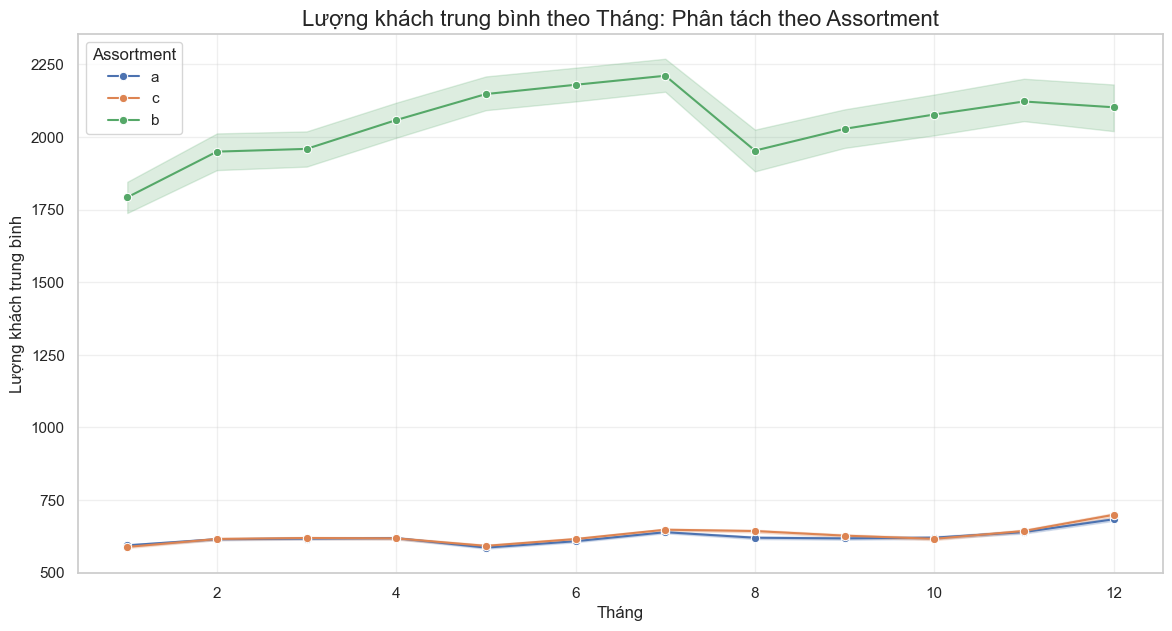

In [282]:
# Thiết lập kích thước biểu đồ
plt.figure(figsize=(14, 7))

sns.lineplot(x='Month', y='Customers', hue='Assortment', data=df_open, marker='o')

plt.title('Lượng khách trung bình theo Tháng: Phân tách theo Assortment', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Lượng khách trung bình', fontsize=12)
plt.legend(title='Assortment')
plt.grid(True, alpha=0.3)
plt.show()

- **Sức bật của sự đa dạng**: Các nhóm Assortment đều tăng mạnh vào dịp cuối năm Giáng Sinh (đặc biệt là nhóm có danh mục mở rộng - 'extra') thường hưởng lợi lớn nhất. Nhu cầu tháng 12 không chỉ là xoay quanh những sản phẩm mỹ phẩm thông thường mà chuyển dịch mạnh sang quà tặng và các mặt hàng không thiết yếu, khiến các cửa hàng có Assortment phong phú đạt doanh thu tối đa.

### Actionable Insights:
- Sự khác biệt giữa Assortment 'a' (basic), 'c' (extended) và 'b' (extra) cho thấy hành vi mua sắm khác nhau.
* Nhóm Assortment 'b' (Extra) - "Điểm đến mua sắm (Destination Store)"
- Insight:
    + Doanh thu vượt trội so với nhóm 'a' và 'c'.
    + Khách hàng đến đây không chỉ mua nhu yếu phẩm mà mua những thứ "không tìm thấy ở chỗ khác" (đồ điện tử, gia dụng, quà tặng...).
- Actionable Plan:
    + Tăng trải nghiệm: Khách hàng dành nhiều thời gian ở đây hơn. $\rightarrow$ Action: Bố trí nhân viên tư vấn chuyên sâu tại quầy kệ (consultative selling).
    + Bundle hàng tồn kho: Dùng các mặt hàng "Extra" (có biên lợi nhuận cao hoặc độc lạ) để bán kèm các mặt hàng "Basic" đang tồn kho nhiều.
    + VIP Program: Khách hàng mua Assortment 'b' có giá trị trọn đời (CLV) cao. Cần chăm sóc riêng để giữ chân họ.
* Nhóm Assortment 'a' & 'c' (Basic & Extended) - "Cửa hàng tiện dụng"
- Insight:Doanh thu thấp hơn, phục vụ nhu cầu cơ bản hàng ngày.
    + Biến động doanh thu phụ thuộc hoàn toàn vào lưu lượng khách (Traffic).
- Actionable Plan:
    + Cạnh tranh bằng giá (Pricing Strategy): Vì hàng hóa cơ bản, khách rất nhạy cảm về giá. $\rightarrow$ Action: Sử dụng các mặt hàng thiết yếu (sữa, bánh mì...) làm "Loss Leader" (bán hòa vốn/lỗ nhẹ) để kéo khách vào cửa hàng.
    + Tối ưu kệ hàng (Planogram): Loại bỏ các SKU (mã hàng) bán chậm. Chỉ tập trung vào top 20% mặt hàng bán chạy nhất (Pareto Principle) để tối ưu vòng quay vốn.

| Nhóm             | Đặc điểm chính                                   | Chiến lược cốt lõi     | Hành động ngay (Next Step)                                                        |
|------------------|---------------------------------------------------|--------------------------|------------------------------------------------------------------------------------|
| StoreType 'b'    | Khách đông, ổn định quanh năm                     | Tối ưu vận hành         | Rà soát quy trình thanh toán, giảm thời gian chờ đợi.                             |
| StoreType 'a', 'c', 'd' | Bùng nổ tháng 12, thấp các tháng khác     | Tối ưu mùa vụ           | Lên kế hoạch nhập hàng tháng 11 ngay từ bây giờ. Cắt giảm chi phí các tháng đầu năm. |
| Assortment 'b'   | Doanh thu cao, hàng hóa đa dạng                   | Tăng giá trị đơn hàng   | Tạo các gói quà tặng (Gift set) cao cấp cho dịp lễ.                                |
| Assortment 'a', 'c' | Nhu cầu cơ bản                                | Kéo Traffic              | Chạy khuyến mãi các mặt hàng thiết yếu để lôi kéo người dân khu vực xung quanh.   |


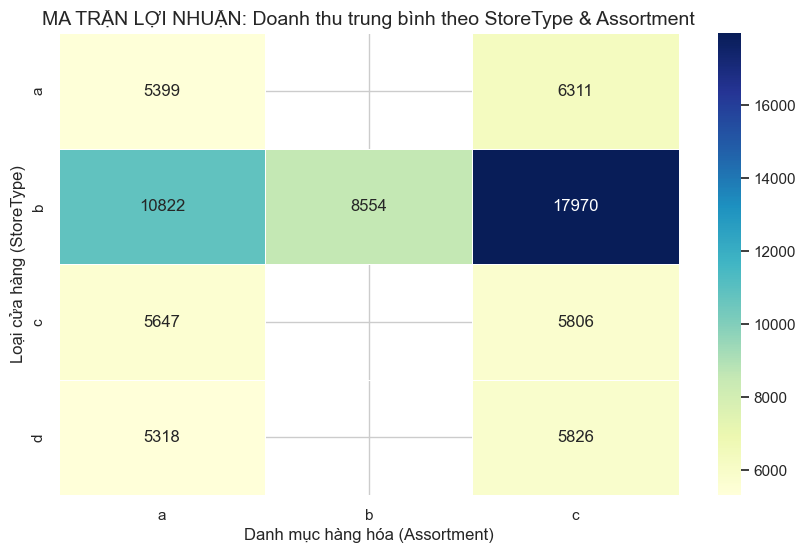

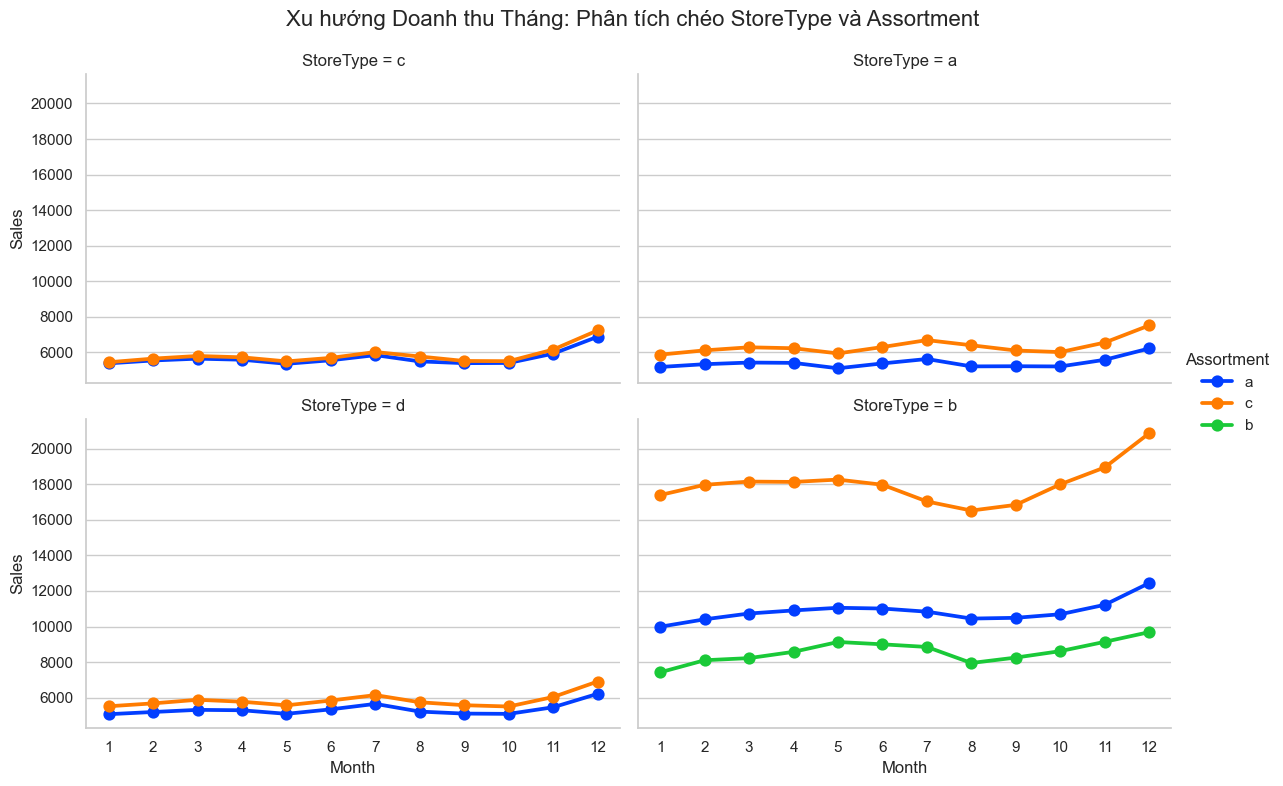

In [283]:
# --- BƯỚC 1: NHÌN TỔNG QUAN (HEATMAP) ---
# Cách nhanh nhất để thấy "điểm nóng" doanh thu là dùng Heatmap
# Tính doanh thu trung bình cho từng cặp (StoreType, Assortment)
niche_matrix = df_open.groupby(['StoreType', 'Assortment'])['Sales'].mean().unstack()

plt.figure(figsize=(10, 6))
# annot=True để hiển thị số tiền cụ thể, fmt=".0f" để làm tròn số
sns.heatmap(niche_matrix, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('MA TRẬN LỢI NHUẬN: Doanh thu trung bình theo StoreType & Assortment', fontsize=14)
plt.ylabel('Loại cửa hàng (StoreType)')
plt.xlabel('Danh mục hàng hóa (Assortment)')
plt.show()

# --- BƯỚC 2: NHÌN CHI TIẾT XU HƯỚNG (FACET GRID) ---
# Vẽ biểu đồ đường theo tháng cho từng nhóm để xem tính mùa vụ
g = sns.FacetGrid(df_open, col="StoreType", hue="Assortment", 
                  col_wrap=2, height=4, aspect=1.5, palette='bright')
g.map(sns.pointplot, "Month", "Sales", order=range(1, 13), errorbar=None)
g.add_legend(title='Assortment')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Xu hướng Doanh thu Tháng: Phân tích chéo StoreType và Assortment', fontsize=16)
plt.show()

# 1.2. Kẻ thù của doanh thu - Chủ Nhật lười biếng

C:\Users\Admin\AppData\Local\Temp\ipykernel_12208\2096626131.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='Sales', data=df_open, estimator=np.mean, errorbar=None, palette="muted")


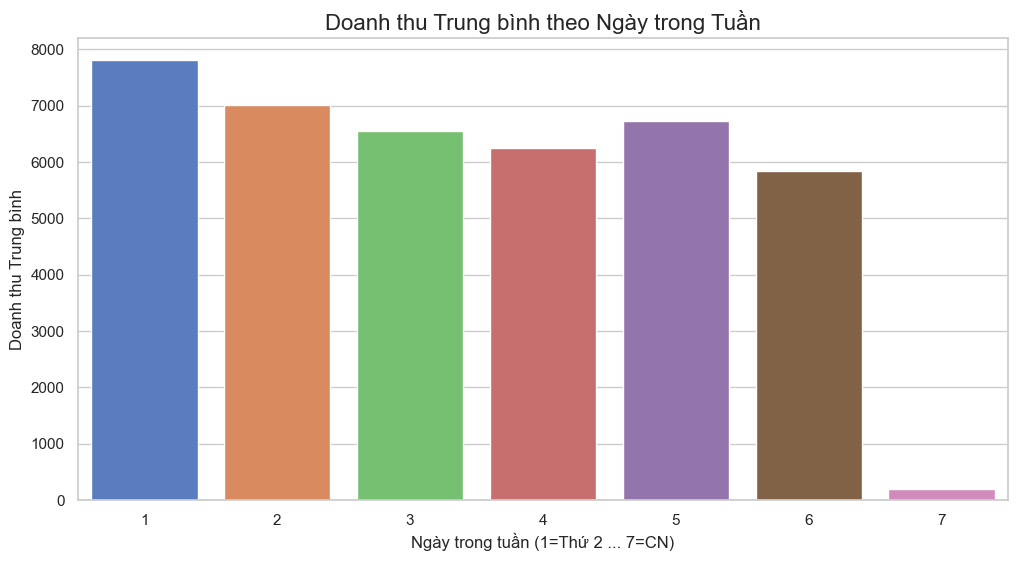

In [284]:
# Doanh thu trung bình theo Ngày trong tuần
plt.figure(figsize=(12, 6))
sns.barplot(x='DayOfWeek', y='Sales', data=df_open, estimator=np.mean, errorbar=None, palette="muted")
plt.title('Doanh thu Trung bình theo Ngày trong Tuần', fontsize=16)
plt.xlabel('Ngày trong tuần (1=Thứ 2 ... 7=CN)', fontsize=12) # Kiểm tra lại quy ước trong dữ liệu của bạn
plt.ylabel('Doanh thu Trung bình', fontsize=12)
plt.show()

1. Các quan sát chính từ dữ liệu (Data Observations)
- Ngày bán tốt nhất: Thứ Hai (Day 1)

- Đây là cột cao nhất trên biểu đồ (~7.800).

- Khách hàng có xu hướng mua sắm dồn dập vào đầu tuần.

- Ngày "chết": Chủ Nhật (Day 7)

- Doanh thu gần như bằng 0 (cột màu tím hồng rất thấp).

=> Điều này phản ánh thực tế: Hầu hết các cửa hàng Rossmann (ở Châu Âu) đóng cửa vào Chủ Nhật theo luật lao động/văn hóa, chỉ một số rất ít mở cửa (có thể ở nhà ga, sân bay).


2. Giải thích ý nghĩa (Business Insights)
- Hiệu ứng "Lò xo nén lại" (Post-Sunday Recovery):

- Việc Thứ 2 có doanh thu cao nhất liên quan trực tiếp đến việc Chủ Nhật đóng cửa. Nhu cầu bị nén lại trong ngày Chủ Nhật sẽ "bung" ra vào ngày Thứ Hai ngay khi cửa hàng mở cửa lại.

# Liệu Chủ Nhật có phải là ngày "chết" với mọi loại cửa hàng?

--- TỶ LỆ MỞ CỬA VÀO CHỦ NHẬT THEO LOẠI CỬA HÀNG ---


,% Mở cửa Chủ Nhật
StoreType,
a,1.401560
b,98.401421
c,0.000000
d,0.622108


C:\Users\Admin\AppData\Local\Temp\ipykernel_12208\2218604633.py:21: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x='DayOfWeek', y='Sales', hue='StoreType', data=df_open,


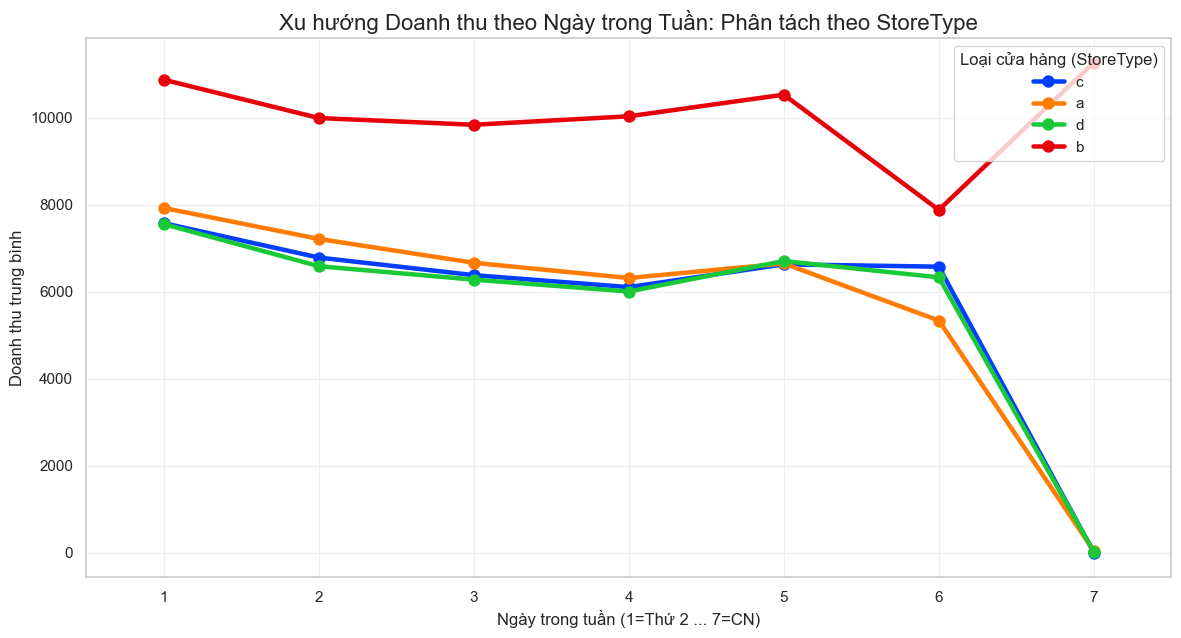

In [285]:
# --- BƯỚC 1: KIỂM TRA TỶ LỆ MỞ CỬA VÀO CHỦ NHẬT (Dùng df_merge gốc chứa cả ngày đóng cửa) ---
# Lọc lấy tất cả các ngày là Chủ Nhật (DayOfWeek = 7)
all_sundays = df_merge[df_merge['DayOfWeek'] == 7]

# Tính tỷ lệ phần trăm số ngày mở cửa (Open = 1) trên tổng số ngày Chủ Nhật theo từng loại cửa hàng
sunday_open_rates = all_sundays.groupby('StoreType')['Open'].mean() * 100

print("--- TỶ LỆ MỞ CỬA VÀO CHỦ NHẬT THEO LOẠI CỬA HÀNG ---")
# Hiển thị kết quả, dùng màu để highlight
display(sunday_open_rates.to_frame(name='% Mở cửa Chủ Nhật').style.background_gradient(cmap='Greens'))


# --- BƯỚC 2: VẼ BIỂU ĐỒ XU HƯỚNG TUẦN THEO TỪNG LOẠI CỬA HÀNG (Dùng df_open) ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))

# Sử dụng tham số 'hue' để tách màu theo StoreType
# Dùng pointplot để thấy rõ sự biến động hơn là barplot
sns.pointplot(x='DayOfWeek', y='Sales', hue='StoreType', data=df_open, 
              palette='bright', errorbar=None, markers='o', scale=1.2)

plt.title('Xu hướng Doanh thu theo Ngày trong Tuần: Phân tách theo StoreType', fontsize=16)
plt.xlabel('Ngày trong tuần (1=Thứ 2 ... 7=CN)', fontsize=12)
plt.ylabel('Doanh thu trung bình', fontsize=12)
plt.legend(title='Loại cửa hàng (StoreType)', loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()


- Nhìn bảng "Tỷ lệ mở cửa Chủ Nhật":

    + StoreType 'b' có tỷ lệ mở cửa vào ngày chủ nhật khoảng 98%, rất cao so với 3 loại cửa hàng còn lại với 1.4% của a, 0.6% của d và c đóng cửa hoàn toàn vào ngày Chủ Nhật.

=> Kết luận: Xu hướng "Chủ Nhật chết" KHÔNG ĐÚNG với cửa hàng loại 'b'. Cửa hàng loại 'b' là ngoại lệ.

- Nhìn biểu đồ đường (Pointplot):

    + Ta thấy 3 đường (tượng trưng cho a, c, d) có hình dạng giống biểu đồ chung: Cao vào Thứ 2, giảm dần và chạm đáy vào Chủ Nhật.

    + Riêng đường của StoreType 'b' sẽ có hình dáng rất khác, nó tăng vọt vào Chủ Nhật thay vì giảm?

## Actionable Insights:
- Dựa trên biểu đồ và dữ liệu thực tế: Nhóm cửa hàng 'a', 'c', 'd' đóng cửa Chủ Nhật (Sales = 0) trong khi Nhóm 'b' vẫn hoạt động mạnh, chúng ta đang chứng kiến một hiện tượng tâm lý mua sắm thú vị gọi là "Hiệu ứng Lò Xo" (Spring Effect) và "Sự Độc Quyền Tạm Thời" (Temporary Monopoly).
## 1. Nhóm StoreType ‘a’, ‘c’, ‘d’ (Đóng cửa Chủ Nhật)
**Hiệu ứng:** *Spring Effect → Monday Spike* (nhu cầu dồn lại → Thứ Hai cao điểm)

**Staffing (Nhân sự)**
- Thứ Hai = ngày cao điểm → không xếp nghỉ cho nhân sự chủ chốt.
- Tăng cường thu ngân (cashiers) vào ca sáng Thứ Hai.
- Thứ Bảy = ngày chuẩn bị → ca chiều/tối phải restock đầy kệ.

**Supply Chain (Chuỗi cung ứng)**
- Giao hàng vào sáng sớm Thứ Hai hoặc tối Thứ Bảy.
- Dự báo tồn kho ưu tiên trọng số cao cho Thứ Hai (đặc biệt hàng tươi sống).
- Tránh OOS vào Thứ Hai vì khách không quay lại vào Thứ Ba.

**Marketing**
- Chạy chương trình “Weekend Stock-up” vào Thứ Bảy.
- Khuyến khích mua gói lớn (bulk size) để dùng cho Chủ Nhật.

# 2. Nhóm StoreType ‘b’ (Mở cửa Chủ Nhật)
**Hiệu ứng:** *Temporary Monopoly* (độc quyền tạm thời trong Chủ Nhật)

**Pricing (Giá bán)**
- Không giảm giá vào Chủ Nhật.
- Giữ giá niêm yết hoặc bán combo tiện lợi.

**Assortment (Danh mục hàng hóa)**
- Tập trung hàng thiết yếu & khẩn cấp: đồ ăn nhanh, nước giải khát, thuốc cơ bản.
- Trưng bày nhóm hàng này tại Golden Zone trong Chủ Nhật.

**Operations (Vận hành)**
- Bố trí ca làm việc cuối tuần riêng (ưu tiên part-time để tối ưu chi phí).
- Luôn có một quản lý cứng trực Chủ Nhật để xử lý sự cố.


In [286]:
# --- BƯỚC 1: CHUẨN BỊ SỐ LIỆU ---
# Tính doanh thu trung bình theo ngày trong tuần
daily_sales = df_open.groupby('DayOfWeek')['Sales'].mean()

# Tính tỷ lệ mở cửa của Chủ Nhật (dựa trên dữ liệu gốc df_merge để tính cả ngày đóng cửa)
sunday_open_rate = df_merge[df_merge['DayOfWeek'] == 7]['Open'].mean() * 100

# --- BƯỚC 2: KIỂM TRA INSIGHT "BÙ ĐẮP SAU NGÀY NGHỈ" (POST-SUNDAY RECOVERY) ---
# Doanh thu Thứ 2
monday_sales = daily_sales[1]

# Doanh thu trung bình các ngày giữa tuần (Thứ 3, 4, 5) để làm mốc so sánh "ngày thường"
midweek_sales = daily_sales[[2, 3, 4]].mean()

# Tính % tăng trưởng của Thứ 2 so với ngày thường
recovery_growth = (monday_sales - midweek_sales) / midweek_sales * 100

print("--- 1. KIỂM TRA HIỆU ỨNG BÙ ĐẮP SAU NGÀY NGHỈ (THỨ 2) ---")
print(f"Tỷ lệ cửa hàng mở cửa vào Chủ Nhật: {sunday_open_rate:.2f}%")
print(f"Doanh thu trung bình Thứ 2:         {monday_sales:,.0f}")
print(f"Doanh thu trung bình Giữa tuần:     {midweek_sales:,.0f} (Thứ 3-5)")
print(f"=> Mức tăng trưởng 'Bù đắp':        +{recovery_growth:.2f}%")

if sunday_open_rate < 5 and recovery_growth > 10:
    print("=> KẾT LUẬN: ĐÚNG. Chủ Nhật hầu như đóng cửa và Thứ 2 tăng vọt so với ngày thường.")
else:
    print("=> KẾT LUẬN: CẦN XEM XÉT LẠI. Dữ liệu không ủng hộ mạnh mẽ giả thuyết này.")


# --- BƯỚC 3: KIỂM TRA INSIGHT "TÂM LÝ MUA SẮM CUỐI TUẦN" (THỨ 6) ---
friday_sales = daily_sales[5]
thursday_sales = daily_sales[4] # So với ngày liền trước

# Tính % tăng trưởng của Thứ 6 so với Thứ 5
friday_lift = (friday_sales - thursday_sales) / thursday_sales * 100

print("\n--- 2. KIỂM TRA TÂM LÝ MUA SẮM CUỐI TUẦN (THỨ 6) ---")
print(f"Doanh thu trung bình Thứ 5:         {thursday_sales:,.0f}")
print(f"Doanh thu trung bình Thứ 6:         {friday_sales:,.0f}")
print(f"=> Mức tăng trưởng Thứ 6 vs Thứ 5:  +{friday_lift:.2f}%")

if friday_lift > 5:
    print("=> KẾT LUẬN: ĐÚNG. Có sự tăng trưởng đáng kể vào Thứ 6 (chuẩn bị cho cuối tuần).")
else:
    print("=> KẾT LUẬN: SAI. Thứ 6 không chênh lệch nhiều so với Thứ 5.")

# --- (NÂNG CAO) KIỂM ĐỊNH THỐNG KÊ (T-TEST) ---
# Để chắc chắn sự khác biệt không phải do ngẫu nhiên
print("\n--- (Nâng cao) Kiểm định thống kê ---")
sales_mon = df_open[df_open['DayOfWeek'] == 1]['Sales']
sales_tue_thu = df_open[df_open['DayOfWeek'].isin([2,3,4])]['Sales']

import scipy.stats as stats
t_stat, p_val = stats.ttest_ind(sales_mon, sales_tue_thu, equal_var=False)
if p_val < 0.05:
    print(f"Kiểm định T-test xác nhận sự khác biệt giữa Thứ 2 và Ngày thường là CÓ Ý NGHĨA THỐNG KÊ (p-value={p_val:.2e} < 0.05).")
else:
    print("Sự khác biệt chưa đủ ý nghĩa thống kê.")

--- 1. KIỂM TRA HIỆU ỨNG BÙ ĐẮP SAU NGÀY NGHỈ (THỨ 2) ---
Tỷ lệ cửa hàng mở cửa vào Chủ Nhật: 2.48%
Doanh thu trung bình Thứ 2:         7,809
Doanh thu trung bình Giữa tuần:     6,603 (Thứ 3-5)
=> Mức tăng trưởng 'Bù đắp':        +18.27%
=> KẾT LUẬN: ĐÚNG. Chủ Nhật hầu như đóng cửa và Thứ 2 tăng vọt so với ngày thường.

--- 2. KIỂM TRA TÂM LÝ MUA SẮM CUỐI TUẦN (THỨ 6) ---
Doanh thu trung bình Thứ 5:         6,248
Doanh thu trung bình Thứ 6:         6,723
=> Mức tăng trưởng Thứ 6 vs Thứ 5:  +7.61%
=> KẾT LUẬN: ĐÚNG. Có sự tăng trưởng đáng kể vào Thứ 6 (chuẩn bị cho cuối tuần).

--- (Nâng cao) Kiểm định thống kê ---
Kiểm định T-test xác nhận sự khác biệt giữa Thứ 2 và Ngày thường là CÓ Ý NGHĨA THỐNG KÊ (p-value=0.00e+00 < 0.05).


# 1.3. The writing on the "holiday" (Dấu hiệu cho những ngày lễ)
-- Câu thành ngữ gốc: "The writing on the wall" --

Tương tự như ngày chủ nhật, những ngày có ngày lễ là những ngày chuỗi cửa hàng Rossmann đóng cửa. Vì vậy để hiểu hành vi của khách hàng cũng như tối ưu hóa doanh thu cho cửa hàng vào những dịp này, chúng ta sẽ cùng xem xét doanh thu và lượng khách trung bình trước thời điểm ngày lễ.

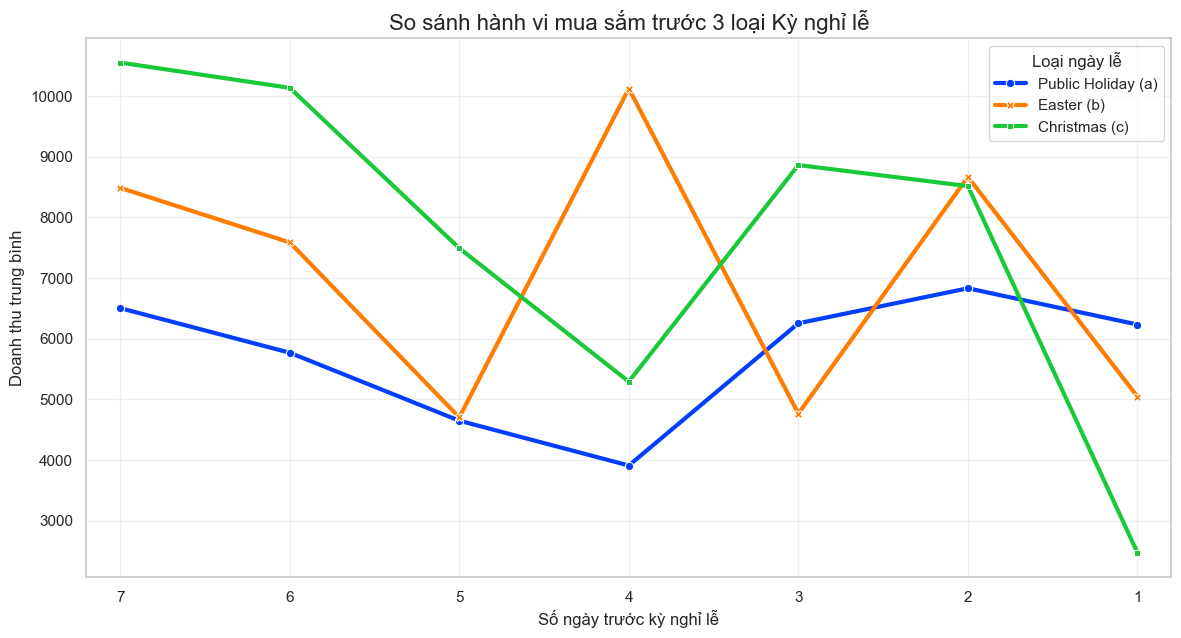

--- DOANH THU TRUNG BÌNH CHI TIẾT (Đơn vị: Tiền tệ) ---


HolidayType,Christmas (c),Easter (b),Public Holiday (a)
DaysBefore,,,
7,"10,550","8,486","6,503"
6,"10,134","7,586","5,768"
5,"7,492","4,703","4,648"
4,"5,292","10,122","3,909"
3,"8,862","4,765","6,253"
2,"8,514","8,666","6,831"
1,"2,474","5,046","6,233"


In [287]:
# BƯỚC 1: CHUẨN BỊ DỮ LIỆU 
# Định nghĩa các loại ngày lễ và tên gọi để hiển thị cho đẹp
holiday_map = {'a': 'Public Holiday (a)', 'b': 'Easter (b)', 'c': 'Christmas (c)'}
results = []

# BƯỚC 2: TÍNH TOÁN VÒNG LẶP 
for h_code, h_name in holiday_map.items():
    # Lấy danh sách các ngày diễn ra loại lễ này từ dữ liệu gốc (df_merge)
    # (Dùng df_merge để lấy cả những ngày đóng cửa)
    specific_holiday_dates = df_merge[df_merge['StateHoliday'] == h_code]['Date'].unique()
    specific_holiday_dates = pd.to_datetime(specific_holiday_dates)
    
    # Xét khung thời gian 7 ngày trước lễ
    for days_before in range(1, 8):
        # Tìm ngày tương ứng: Lấy ngày lễ TRỪ đi số ngày (VD: 25/12 - 1 ngày = 24/12)
        target_dates = [h_date - pd.Timedelta(days=days_before) for h_date in specific_holiday_dates]
        
        # Tính doanh thu trung bình của những ngày này trong tập dữ liệu mở cửa (df_open)
        # Chỉ tính những cửa hàng có mở cửa
        avg_sales = df_open[df_open['Date'].isin(target_dates)]['Sales'].mean()
        
        results.append({
            'HolidayType': h_name,
            'DaysBefore': days_before,
            'AvgSales': avg_sales
        })

# Tạo DataFrame kết quả
df_trend_detailed = pd.DataFrame(results)

# --- BƯỚC 3: TRỰC QUAN HÓA SO SÁNH ---
plt.figure(figsize=(14, 7))

# Vẽ biểu đồ đường để thấy rõ xu hướng của từng loại lễ
# hue='HolidayType' để tách 3 đường màu khác nhau
sns.lineplot(data=df_trend_detailed, x='DaysBefore', y='AvgSales', hue='HolidayType', 
             style='HolidayType', markers=True, dashes=False, linewidth=3, palette='bright')

# Đảo ngược trục X để hiển thị từ 7 ngày trước -> 1 ngày trước (theo dòng thời gian)
plt.xlim(7.2, 0.8) 

plt.title('So sánh hành vi mua sắm trước 3 loại Kỳ nghỉ lễ', fontsize=16)
plt.xlabel('Số ngày trước kỳ nghỉ lễ', fontsize=12)
plt.ylabel('Doanh thu trung bình', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Loại ngày lễ')

plt.show()

# --- BƯỚC 4: IN BẢNG SỐ LIỆU CHI TIẾT (PIVOT TABLE) ---
# Chuyển đổi bảng để dễ so sánh con số
pivot_trend = df_trend_detailed.pivot(index='DaysBefore', columns='HolidayType', values='AvgSales')
# Sắp xếp index giảm dần (từ 7 về 1)
pivot_trend = pivot_trend.sort_index(ascending=False)

print("--- DOANH THU TRUNG BÌNH CHI TIẾT (Đơn vị: Tiền tệ) ---")
display(pivot_trend.style.format("{:,.0f}").background_gradient(cmap='YlOrRd'))

In [288]:
from datetime import timedelta

# Đảm bảo cột Date là kiểu datetime
df_open['Date'] = pd.to_datetime(df_open['Date'])

# Hàm để lấy dữ liệu 7 ngày trước lễ
def get_pre_holiday_data(df, holiday_type):
    # Lấy danh sách các ngày diễn ra lễ loại này
    holiday_dates = df[df['StateHoliday'] == holiday_type]['Date'].unique()
    
    pre_holiday_data = []
    
    for h_date in holiday_dates:
        h_date = pd.Timestamp(h_date)
        # Tạo khung thời gian: 7 ngày trước lễ (từ ngày -7 đến ngày -1)
        start_date = h_date - timedelta(days=7)
        end_date = h_date - timedelta(days=1)
        
        # Lọc dữ liệu trong khoảng này
        mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
        temp_df = df[mask].copy()
        
        # Tạo cột đếm ngược: -7, -6, ... -1
        if not temp_df.empty:
            temp_df['DaysBeforeHoliday'] = (temp_df['Date'] - h_date).dt.days
            temp_df['HolidayType'] = holiday_type
            pre_holiday_data.append(temp_df)
            
    if pre_holiday_data:
        return pd.concat(pre_holiday_data)
    else:
        return pd.DataFrame()

# Tổng hợp dữ liệu cho 3 loại lễ a, b, c
list_dfs = []
holiday_map = {'a': 'Public Holiday (a)', 'b': 'Easter (b)', 'c': 'Christmas (c)'}

for h_code in holiday_map.keys():
    df_temp = get_pre_holiday_data(df_open, h_code)
    if not df_temp.empty:
        list_dfs.append(df_temp)

df_pre_holiday = pd.concat(list_dfs)

# Đổi tên cột HolidayType cho dễ hiểu trên biểu đồ
df_pre_holiday['HolidayLabel'] = df_pre_holiday['HolidayType'].map(holiday_map)



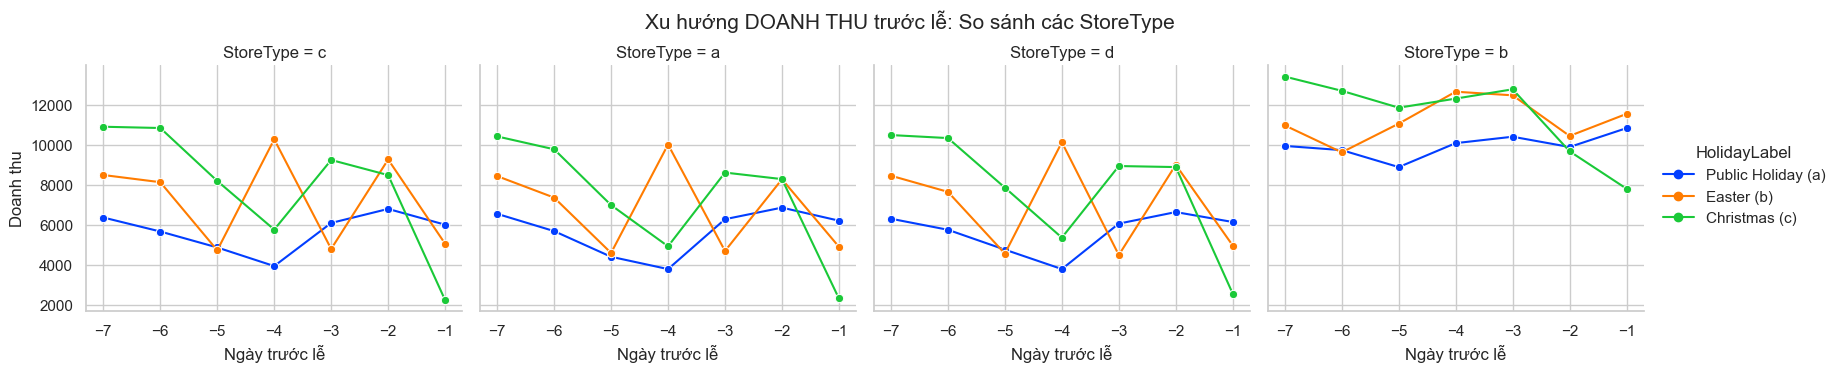

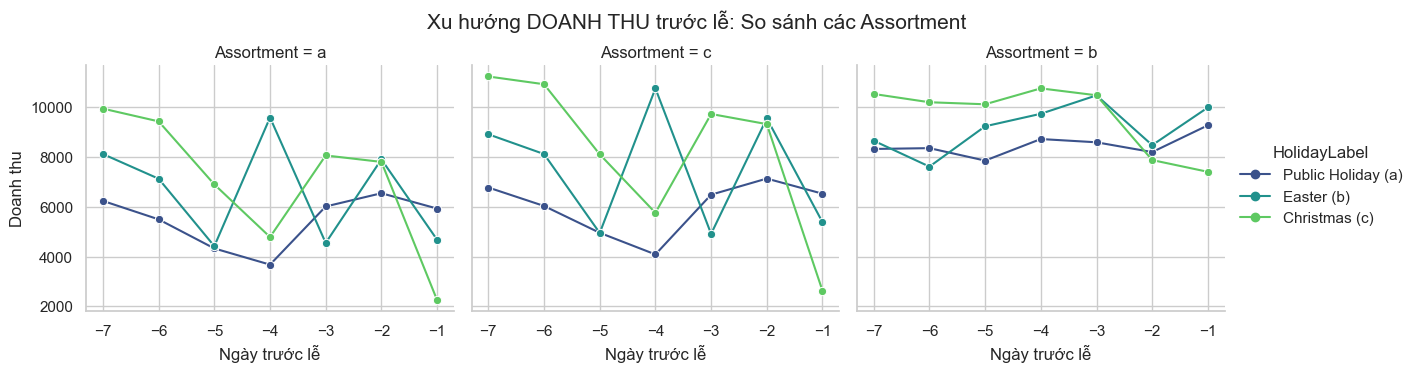

In [289]:
# Thiết lập chung cho đẹp
sns.set_style("whitegrid")

# --- PHẦN 1: PHÂN TÍCH RIÊNG THEO LOẠI CỬA HÀNG (STORETYPE) ---
# Vẽ Sales
g1 = sns.relplot(
    data=df_pre_holiday,
    x="DaysBeforeHoliday", y="Sales",
    hue="HolidayLabel",      # Màu sắc theo loại ngày lễ
    col="StoreType",         # Tách cột theo loại cửa hàng
    kind="line", 
    palette="bright", marker="o",
    height=3.5, aspect=1.2, errorbar=None
)
g1.fig.suptitle("Xu hướng DOANH THU trước lễ: So sánh các StoreType", y=1.05, fontsize=15)
g1.set_axis_labels("Ngày trước lễ", "Doanh thu")
plt.show()


# --- PHẦN 2: PHÂN TÍCH RIÊNG THEO DANH MỤC HÀNG (ASSORTMENT) ---
# Vẽ Sales
g3 = sns.relplot(
    data=df_pre_holiday,
    x="DaysBeforeHoliday", y="Sales",
    hue="HolidayLabel",
    col="Assortment",        # Tách cột theo Assortment
    kind="line", 
    palette="viridis", marker="o",
    height=3.5, aspect=1.2, errorbar=None
)
g3.fig.suptitle("Xu hướng DOANH THU trước lễ: So sánh các Assortment", y=1.05, fontsize=15)
g3.set_axis_labels("Ngày trước lễ", "Doanh thu")
plt.show()


# 1. Kỳ nghỉ loại 'a' – Public Holiday (Lễ chung)
**Đặc trưng:** Các ngày Quốc khánh, Lễ Lao động, kỳ nghỉ ngắn.

## Data Signature (Hành vi dữ liệu)
- Hiệu ứng **Flash Spike**: Doanh số bình thường cả tuần, chỉ bật tăng mạnh vào **ngày -1**.
- Ảnh hưởng mạnh tới **StoreType 'a'** và **Assortment 'a'** (hàng thiết yếu).

## Tâm lý khách hàng
- “Mai nghỉ → hôm nay mua để mai dùng”.
- Nhu cầu rất ngắn hạn, mang tính tiện lợi.

## Actionable Insight
- **Tối ưu thu ngân**: Mở tối đa quầy vào giờ tan tầm ngày -1.
- **Trưng bày hàng Impulse**: sản phẩm (thuốc men, mỹ phẩm) đặt ở lối đi chính; không cần giảm giá sâu.

---

# 2. Kỳ nghỉ loại 'b' – Easter (Lễ Phục Sinh)
**Đặc trưng:** Gắn với quà tặng nhỏ, tiệc gia đình, không quá hoành tráng.

## Data Signature
- Hiệu ứng **Ripple Effect**: Sức mua tăng nhẹ, không dốc như loại 'a' hoặc 'c'.
- StoreType **'b'** có lợi thế vì mở cửa linh hoạt xuyên lễ.

## Tâm lý khách hàng
- Có kế hoạch hơn: sản xuất sản phẩm có trang trí hình dạng hoặc ý tưởng liên quan đến ngày lễ phục sinh (thỏ, trứng)
- Không tiêu thụ lớn như Giáng sinh.

## Actionable Insight
- **Tập trung Gifting**: Nhập các SKU mùa vụ (chocolate hình thỏ/trứng).
- **StoreType 'b'**: Tăng nhân sự vì khách từ các StoreType khác sẽ đổ về.

---

# 3. Kỳ nghỉ loại 'c' – Christmas (Giáng Sinh)
**Đặc trưng:** “Golden Season” – mùa bán hàng lớn nhất.

## Data Signature
- Hiệu ứng **Uphill Climb**: Doanh số tăng dần từ ngày -7 → đạt đỉnh vào **ngày -2, -1**.
- **Assortment 'c'** (Extended) vượt trội, tăng mạnh nhất.

## Tâm lý khách hàng
- **Trading Up**: Ưu tiên hàng cao cấp, nhập khẩu, premium.
- Ít nhạy cảm giá (Price Inelastic).

## Actionable Insight
- **Thay đổi Layout**: Đặt Assortment 'c' ở vị trí prime; đẩy Assortment 'a' vào khu phụ.
- **Cross-selling**: mỹ phẩm, thuốc men, và các sản phẩm cao cấp.
- **Logistics**: Nhập hàng xong từ **ngày -7**; tránh nghẽn kho ngày -3 để tập trung bán hàng.


| Loại Lễ                 | Đặc điểm chính                    | Chiến lược cốt lõi                                                         |
|-------------------------|------------------------------------|----------------------------------------------------------------------------|
| Loại 'a' (Lễ thường)    | Tăng vọt ngày cuối                 | Tốc độ: Xử lý nhanh ngày -1. Bán đồ ăn nhanh/tiệc tùng.                   |
| Loại 'b' (Phục sinh)    | Tăng vừa phải                      | Khác biệt: Tận dụng StoreType 'b'. Bán quà tặng nhỏ.                       |
| Loại 'c' (Giáng sinh)   | Tăng dài hạn & Mạnh nhất           | Đa dạng hóa: Đẩy mạnh Assortment 'c'. Kích thích mua sắm giá trị cao.     |


# Tóm tắt
## 1. 'Mỏ vàng' doanh thu
- Doanh thu của chuỗi cửa hàng Rossmann có tính mùa vụ cao. Khi quan sát biểu đồ "Doanh thu trung bình theo từng tháng", ta có thể dễ dàng nhận thấy những đặc điểm cụ thể như sau:
    + Tháng 11, 12 là **"mỏ vàng"** doanh thu khi ghi nhận sự tăng trưởng doanh thu trung bình rõ rệt nhờ ngày lễ Giáng Sinh, một trong những ngày lễ lớn nhất trong năm.
    + Tháng 1 đầu năm luôn ghi nhận doanh thu trung bình thấp một cách đáng kể. Bởi sau mùa lễ hội, tháng 1 luôn chạm đáy doanh thu khi khách hàng **"thắt chặt chi tiêu"**.
    + Thời gian giữa năm, doanh thu trung bình luôn có xu hướng đi xuống mạnh ở tháng 5 và tăng trở lại vào 2 tháng 6,7. Liệu có phải tháng 5 đang là tháng "chết" đối với doanh thu của cửa hàng hay không? Hãy cùng tìm hiểu ở phần kế tiếp.

## 2. Kẻ thù của doanh thu - CN lười biếng
- Hiện tượng: Tại sao Thứ Hai luôn là ngày bán tốt nhất tuần?

- Nguyên nhân: Do Chủ Nhật đóng cửa (theo phong tục Châu Âu), nhu cầu mua sắm bị "nén" lại giống như chiếc lò xo.

- Hệ quả: Khi cửa hàng mở lại vào Thứ Hai, chiếc lò xo bung ra tạo nên sự bùng nổ doanh thu (Post-Sunday Recovery).

- Ngoại lệ thú vị: Cửa hàng loại 'b' (thường ở ga tàu/sân bay?) là kẻ ngoại đạo duy nhất mở cửa Chủ Nhật và phá vỡ quy luật này.

- Thông điệp (Message): Tối ưu hóa nhân sự (Staffing): Thứ 2 cần full nhân viên để hứng "lò xo", trong khi Chủ Nhật là ngày nghỉ tuyệt đối (trừ loại 'b').

## 3. The writing on the 'Holiday'
- Vấn đề: Vì hầu hết các cửa hàng sẽ đóng cửa trong các ngày lễ nên việc xem xét doanh thu vào những ngày này không có ý nghĩa. Vì vậy chúng ta hãy cùng xem doanh thu tb của khách hàng trong 1 tuần trước ngày lễ chính để xem hành vi khách hàng.
- Sự thật: Đối với từng loại ngày lễ, hành vi mua sắm của khách hàng cũng thay đổi đáng kể:
    + Giáng sinh (Người lo xa): Mua từ trước 1 tuần. Sát lễ doanh thu tụt thảm hại. $\rightarrow$ Action: Nhập hàng sớm, xả hàng sớm.
    + Phục sinh (Tàu lượn siêu tốc): Biến động hình chữ W do lịch nghỉ xen kẽ. $\rightarrow$ Action: Bổ sung hàng siêu tốc (Rapid Replenishment).
    + Ngày lễ thường (Nước đến chân mới nhảy): Mua sát nút trước 2 ngày. $\rightarrow$ Action: Flash sale giờ chót.
- Thông điệp (Message): Không có công thức chung cho "Ngày lễ". Mỗi loại lễ cần một chiến lược nhập hàng và nhân sự riêng biệt (Tailored Strategy).

